# Claim Fraud Prediction 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os
import sys

In [3]:
insurance = pd.read_csv('Data/insurance_data.csv')
employees = pd.read_csv('Data/employee_data.csv')
vendors = pd.read_csv('Data/vendor_data.csv')

Let's start by looking information of each dataset. 
Starting with insurance

In [4]:
insurance.head() # preview a sample

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID
0,2020-06-01 00:00:00,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,A,Major Loss,Police,0,1,GA,Savannah,4,AGENT00413,VNDR00556
1,2020-06-01 00:00:00,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,AGENT00769,VNDR00592
2,2020-06-01 00:00:00,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,A,Total Loss,Police,0,1,CO,Grand Junction,19,AGENT00883,VNDR00031
3,2020-06-01 00:00:00,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,AGENT00278,VNDR00075
4,2020-06-01 00:00:00,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,A,Major Loss,Police,0,1,TN,Nashville,18,AGENT00636,VNDR00472


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   object 
 14  STATE  

Let's now create a dictionary with the explanation of each parameter in the insurance dataset

In [6]:
dict_insurance = {'TXN_DATE_TIME':'Transaction Date',
                  'TRANSACTION_ID':'Unique Transaction ID',
                  'CUSTOMER_ID':'Unique Customer ID',
                  'POLICY_NUMBER':'Policy Number',
                  'POLICY_EFF_DT':'Policy Effective Date',
                  'LOSS_DT':'Date on which loss happened',
                  'REPORTED_DT':'Date on which incident was reported',
                  'INSURANCE_TYPE':'Insurance Type',
                  'PREMIUM_AMOUNT':'Premium Amount Paid by the Customer (Monthly)',
                  'CLAIM_AMOUNT':'Claim Amount raised by Customer',
                  'CUSTOMER_NAME':'Customer Full Name',
                  'ADDRES_LINE1':'Customer Address Line 1',
                  'CITY':'Customer Address City Name',
                  'STATE':'Customer Address State Name',
                  'POSTAL_CODE':'Customer Address Postal Code',
                  'SSN':'Customer Social Security Number',
                  'MARITAL_STATUS':'Customer Marital Status',
                  'AGE':'Customer Age',
                  'TENURE':'Customer Tenure with the Insurance Company in Month',
                  'EMPLOYMENT_STATUS':'Customer Employment Status',
                  'NO_OF_FAMILY_MEMBERS':'Number of Family Members',
                  'RISK_SEGMENTATION':'Customer Risk Segmentation or Risk Level',
                  'HOUSE_TYPE':'Customer House Type',
                  'SOCIAL_CLASS':'Customer Income Group -- High Income , Low Income, Mid Income Group',
                  'ROUTING_NUMBER':'Customer Bank Routing Number',
                  'ACCT_NUMBER':'Customer Bank Account Number',
                  'CUSTOMER_EDUCATION_LEVEL':'Customer Education Level',
                  'CLAIM_STATUS':'Claim Status(Approve/Decline)',
                  'INCIDENT_SEVERITY':'Incident Severity Level',
                  'AUTHORITY_CONTACTED':'Which Authority was contacted for the incident?',
                  'ANY_INJURY':'Any injury reported?',
                  'POLICE_REPORT_AVAILABLE':'Is Police Report Available?',
                  'INCIDENT_STATE':'State in which incident happened',
                  'INCIDENT_CITY':'City in which incident happened',
                  'INCIDENT_HOUR_OF_THE_DAY':'Time of incident in hours',
                  'AGENT_ID':'Agent Unique ID who is working on the Claim',
                  'VENDOR_ID':'Vendor Unique ID who is working on the Claim'}

df_insurance = pd.DataFrame.from_dict(dict_insurance, orient='index', columns=['Description'])
print(df_insurance.to_markdown())

|                          | Description                                                         |
|:-------------------------|:--------------------------------------------------------------------|
| TXN_DATE_TIME            | Transaction Date                                                    |
| TRANSACTION_ID           | Unique Transaction ID                                               |
| CUSTOMER_ID              | Unique Customer ID                                                  |
| POLICY_NUMBER            | Policy Number                                                       |
| POLICY_EFF_DT            | Policy Effective Date                                               |
| LOSS_DT                  | Date on which loss happened                                         |
| REPORTED_DT              | Date on which incident was reported                                 |
| INSURANCE_TYPE           | Insurance Type                                                      |
| PREMIUM_

Now, let's repeat the same for the vendors and agents datasets.

In [7]:
employees.head() # preview a sample

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
0,AGENT00001,Ray Johns,1993-06-05,1402 Maggies Way,NaN,Waterbury Center,VT,5677,34584958,HKUN51252328472585
1,AGENT00002,Angelo Borjon,2005-12-27,414 Tanya Pass,NaN,Panama City,FL,32404,107363763,OPIS19290040088204
2,AGENT00003,Candy Spellman,2003-09-02,606 National Street,#306,Fayetteville,AR,72701,81744097,YSCJ67489688482590
3,AGENT00004,Mary Smith,2004-09-23,235 Hugh Thomas Drive,NaN,Panama City,FL,32404,67563771,ZANG21285355574581
4,AGENT00005,Mildred Diaz,2011-06-21,3426 Broadview Street,NaN,Montgomery,AL,36110,114951317,DZFS82244494451134


In [8]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   AGENT_ID            1200 non-null   object
 1   AGENT_NAME          1200 non-null   object
 2   DATE_OF_JOINING     1200 non-null   object
 3   ADDRESS_LINE1       1200 non-null   object
 4   ADDRESS_LINE2       179 non-null    object
 5   CITY                1193 non-null   object
 6   STATE               1200 non-null   object
 7   POSTAL_CODE         1200 non-null   int64 
 8   EMP_ROUTING_NUMBER  1200 non-null   int64 
 9   EMP_ACCT_NUMBER     1200 non-null   object
dtypes: int64(2), object(8)
memory usage: 93.9+ KB


In [9]:
dict_employees = {'AGENT_ID':'Agent Identifier',
                  'AGENT_NAME':'Agent Full Name',
                  'DATE_OF_JOINING':'Date of Joining the Organizations',
                  'ADDRESS_LINE1':'Agent Address Line 1',
                  'CITY':'Agent Address City Name',
                  'STATE':'Agent Address State Name',
                  'POSTAL_CODE':'Agent Address Postal Code',
                  'EMP_ROUTING_NUMBER':'Agent Bank Routing Number',
                  'EMP_ACCT_NUMBER':'Agent Bank Account Number'}
df_employees = pd.DataFrame.from_dict(dict_employees, orient='index', columns=['Description'])
print(df_employees.to_markdown())


|                    | Description                       |
|:-------------------|:----------------------------------|
| AGENT_ID           | Agent Identifier                  |
| AGENT_NAME         | Agent Full Name                   |
| DATE_OF_JOINING    | Date of Joining the Organizations |
| ADDRESS_LINE1      | Agent Address Line 1              |
| CITY               | Agent Address City Name           |
| STATE              | Agent Address State Name          |
| POSTAL_CODE        | Agent Address Postal Code         |
| EMP_ROUTING_NUMBER | Agent Bank Routing Number         |
| EMP_ACCT_NUMBER    | Agent Bank Account Number         |


In [10]:
vendors.head() # preview a sample

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE
0,VNDR00001,"King, Proctor and Jones",2027 North Shannon Drive,#5,Fayetteville,AR,72703
1,VNDR00002,Garcia Ltd,5701 East Shirley Lane,NaN,Montgomery,AL,36117
2,VNDR00003,Cherry LLC,1217 Cottondale Road,NaN,Montgomery,AL,36109
3,VNDR00004,Mays-Benson,227 West Montgomery Cross Road,#736,Savannah,GA,31406
4,VNDR00005,Wilson PLC,23 North Hill Street,NaN,Nashville,TN,37210


In [11]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   ADDRESS_LINE2  97 non-null     object
 4   CITY           594 non-null    object
 5   STATE          600 non-null    object
 6   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 32.9+ KB


In [12]:
dict_vendors = {'VENDOR_ID':'Unique Vendor ID',
                'VENDOR_NAME':'Vendor Full Name',
                'ADDRESS_LINE1':'Vendor Address Line 1',
                'CITY':'Vendor Address City Name',
                'STATE':'Vendor Address State Name',
                'POSTAL_CODE':'Vendor Address Postal Code'}
df_vendors = pd.DataFrame.from_dict(dict_vendors, orient='index', columns=['Description'])
print(df_vendors.to_markdown())

|               | Description                |
|:--------------|:---------------------------|
| VENDOR_ID     | Unique Vendor ID           |
| VENDOR_NAME   | Vendor Full Name           |
| ADDRESS_LINE1 | Vendor Address Line 1      |
| CITY          | Vendor Address City Name   |
| STATE         | Vendor Address State Name  |
| POSTAL_CODE   | Vendor Address Postal Code |


# Data Cleaning and Preprocessing

First, let's notice that each data set contains some information relating time. Let's first convert into data format such columns  

In [13]:
## Insurance Data set
insurance['TXN_DATE_TIME'] = insurance['TXN_DATE_TIME'].astype('datetime64[ns]')
insurance['POLICY_EFF_DT'] = insurance['POLICY_EFF_DT'].astype('datetime64[ns]')
insurance['LOSS_DT'] = insurance['LOSS_DT'].astype('datetime64[ns]')

## Employee Data set
employees['DATE_OF_JOINING'] = employees['DATE_OF_JOINING'].astype('datetime64[ns]')

Let's now check for missing and repeated values

In [14]:
insurance[insurance.duplicated()] # check duplicated rows

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,AGENT_ID,VENDOR_ID


In [15]:
insurance.isna().sum() # missing values per feature

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_

In [16]:
#insurance.isna().sum().sum() # number of missing cells

In [17]:
employees[employees.duplicated()]

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER


In [18]:
employees.isna().sum() # missing values per feature

AGENT_ID                 0
AGENT_NAME               0
DATE_OF_JOINING          0
ADDRESS_LINE1            0
ADDRESS_LINE2         1021
CITY                     7
STATE                    0
POSTAL_CODE              0
EMP_ROUTING_NUMBER       0
EMP_ACCT_NUMBER          0
dtype: int64

In [19]:
vendors[vendors.duplicated()]

,VENDOR_ID,VENDOR_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE


In [20]:
vendors.isna().sum() # missing values per feature

VENDOR_ID          0
VENDOR_NAME        0
ADDRESS_LINE1      0
ADDRESS_LINE2    503
CITY               6
STATE              0
POSTAL_CODE        0
dtype: int64

Ok, first thing to realize is that there are so many missing values in each data set corresponding to address_line2 columns. Since neither our analysis will consider such level of precission or either not all address have secondary address_line2  it is good idea to drop such columns in each dataset. 

In [21]:
insurance.drop('ADDRESS_LINE2', axis=1, inplace=True)
vendors.drop('ADDRESS_LINE2', axis=1, inplace=True)
employees.drop('ADDRESS_LINE2', axis=1, inplace=True)

Additionally, for insurance dataset columns containing personal information such as SSN or account number are not good predictors since will be personal and does not have any prediction power.

In [22]:
insurance.drop(['SSN','ROUTING_NUMBER','ACCT_NUMBER'],axis=1, inplace = True)

In [23]:
print(employees['EMP_ROUTING_NUMBER'].nunique(),employees['EMP_ACCT_NUMBER'].nunique()) # number of unique values


1200 1200


It seems that there are two rows with the same name. Let's check it 

In [24]:
employees[employees['AGENT_NAME'].duplicated() == True] # check duplicated rows

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE,EMP_ROUTING_NUMBER,EMP_ACCT_NUMBER
862,AGENT00863,Sarah Brown,1996-06-08,5436 Dorbrandt Street,Anchorage,AK,99518,21384158,OLBB33201159859153
1126,AGENT01127,Robert Ward,1999-06-02,5150 West Eugie Avenue,Glendale,AZ,85304,31348760,KWFF64231400629759


Since there are not repeating names we can assume that BANK related numbers are personal and drop them due to their lack of predictive power

In [25]:
employees.drop(['EMP_ROUTING_NUMBER','EMP_ACCT_NUMBER'],axis=1, inplace = True)

In [26]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  object        
 7   INSURANCE_TYPE            10000 non-null  object        
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  CITY               

In [27]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   AGENT_ID         1200 non-null   object        
 1   AGENT_NAME       1200 non-null   object        
 2   DATE_OF_JOINING  1200 non-null   datetime64[ns]
 3   ADDRESS_LINE1    1200 non-null   object        
 4   CITY             1193 non-null   object        
 5   STATE            1200 non-null   object        
 6   POSTAL_CODE      1200 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 65.8+ KB


In [28]:
vendors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   VENDOR_ID      600 non-null    object
 1   VENDOR_NAME    600 non-null    object
 2   ADDRESS_LINE1  600 non-null    object
 3   CITY           594 non-null    object
 4   STATE          600 non-null    object
 5   POSTAL_CODE    600 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 28.2+ KB


Now, let's change the data type for certain categories

In [29]:
insurance['RISK_SEGMENTATION']= insurance['RISK_SEGMENTATION'].astype('category')
insurance['INSURANCE_TYPE']= insurance['INSURANCE_TYPE'].astype('category')
insurance['MARITAL_STATUS'] = insurance['MARITAL_STATUS'].astype('category')
insurance['SOCIAL_CLASS']= insurance['SOCIAL_CLASS'].astype('category')

# DataSet : Insurance

In [30]:
insurance.isna().sum()



TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
CITY                          54
STATE                          0
POSTAL_CODE                    0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_CONTACTED            0
ANY_INJURY                     0
POLICE_REPORT_AVAILABLE        0
INCIDENT_STATE                 0
INCIDENT_C

In [31]:
insurance['STATE'].value_counts()

CA    1035
CO     677
FL     650
AR     644
TN     641
AL     623
GA     613
AZ     603
CT     594
KY     581
DC     581
VT     579
MD     576
MA     549
OK     531
AK     523
Name: STATE, dtype: int64

In [32]:
insurance[insurance['STATE']=='VT']['CITY'].value_counts()

Burlington           26
Rutland              24
Hartford             22
Barre                22
Saint Albans City    20
                     ..
Townshend             1
Fairfax               1
Derby                 1
East Haven            1
Wilmington            1
Name: CITY, Length: 91, dtype: int64

In [33]:
employees.isna().sum()

AGENT_ID           0
AGENT_NAME         0
DATE_OF_JOINING    0
ADDRESS_LINE1      0
CITY               7
STATE              0
POSTAL_CODE        0
dtype: int64

In [34]:
employees[employees['CITY'].isna()]

,AGENT_ID,AGENT_NAME,DATE_OF_JOINING,ADDRESS_LINE1,CITY,STATE,POSTAL_CODE
22,AGENT00023,Amy Venice,2009-12-11,386 Pratt Road,NaN,VT,5033
140,AGENT00141,Mike Cress,2003-04-18,71 Racine Road,NaN,VT,5468
268,AGENT00269,Lorraine Johnson,2011-09-27,114 Middle Road,NaN,VT,5488
411,AGENT00412,Sondra Roder,2000-02-15,386 Pratt Road,NaN,VT,5033
646,AGENT00647,Jefferson Tadlock,2006-07-19,16 Clark Street,NaN,VT,5150
720,AGENT00721,Martin Murphy,2016-01-31,942 Lewis Road,NaN,CA,95076
954,AGENT00955,Bryan Dondero,2011-11-22,386 Pratt Road,NaN,VT,5033


In [35]:
#employees['whole_address'] = employees['ADDRESS_LINE1']  + ', ' + employees['STATE'] + ', ' + employees['POSTAL_CODE'].astype(str)

In [36]:
#employees[employees['CITY'].isna()]['whole_address']

In [90]:
## Initialize gogole maps API
import googlemaps
api_file = open("../insurance_prediction/api-key.txt",'r')
api_key = api_file.read()
api_file.close()
gmaps_key = googlemaps.Client(key = api_key)

# change the api key after today

In [38]:
def imput_bygmaps(data, col_missing, col_given, gmaps_key):
    ## Implement Gmaps API to retrieve values for the cities using complementary information of address.
    #  and turn them back again to the dataframe

    df = data.copy() # We rather use a copy to first check if the function works as expected
    missing_values = df[df[col_missing].isna()]# Query rows for a particular column that has nan values['whole_address']
    missing_v_index = missing_values.index.to_list() # Use a list to store the index of rows that need to be imputed. 

    for index in missing_v_index :
        # Include if loop since for certain postal codes if we dont include the cero at the beginning, 
        # it falsely retrieves the name of the city
        if (missing_values.loc[index, 'POSTAL_CODE'] < 10000):
            # construct a full address to use with gmaps api 
            address = missing_values.loc[index, 'ADDRESS_LINE1']  + ', ' + missing_values.loc[index, col_given] + ', 0' + str(missing_values.loc[index, 'POSTAL_CODE'])
        else:
            # construct a full address to use with gmaps api 
            address = missing_values.loc[index, 'ADDRESS_LINE1']  + ', ' + missing_values.loc[index, col_given] + ', ' + str(missing_values.loc[index, 'POSTAL_CODE'])
        # Use geocode API to get information about the verified address
        g = gmaps_key.geocode(address)
        try:
            # Retrieve full address for json output of the API. 
            # Normally comes in the format of 'Address, City, State Postal Code, Country'
            formatted_address = g[0]['formatted_address'].split(', ')
            # Retrieve only the City name
            city = formatted_address[1]
            # replace value in the dataframe
            df.loc[index, col_missing] = city
        except:
            print('City not found for index: ', index)
    return df

In [91]:
employess_1 = imput_bygmaps(data = employees, col_missing = 'CITY', col_given = 'STATE',  gmaps_key = gmaps_key)

In [40]:
for index in employees[employees['CITY'].isna()].index.to_list() :
    print('The recovereed city is : '+ employess_1.loc[index, 'CITY'])
    print('The address withouth the city is: ' + employess_1.loc[index, 'ADDRESS_LINE1']+', '+employess_1.loc[index, 'STATE']+', '+ str(employess_1.loc[index, 'POSTAL_CODE'])) 

The recovereed city is : Bradford
The address withouth the city is: 386 Pratt Road, VT, 5033
The recovereed city is : Milton
The address withouth the city is: 71 Racine Road, VT, 5468
The recovereed city is : Swanton
The address withouth the city is: 114 Middle Road, VT, 5488
The recovereed city is : Bradford
The address withouth the city is: 386 Pratt Road, VT, 5033
The recovereed city is : North Springfield
The address withouth the city is: 16 Clark Street, VT, 5150
The recovereed city is : Royal Oaks
The address withouth the city is: 942 Lewis Road, CA, 95076
The recovereed city is : Bradford
The address withouth the city is: 386 Pratt Road, VT, 5033


In [41]:
insurance_1 = imput_bygmaps(data = insurance, col_missing = 'CITY', col_given = 'STATE', gmaps_key = gmaps_key)

In [42]:
for index in insurance[insurance['CITY'].isna()].index.to_list() :
    print('The recovereed city is : '+ insurance_1.loc[index, 'CITY'])
    print('The address withouth the city is: ' + insurance_1.loc[index, 'ADDRESS_LINE1']+', '+insurance_1.loc[index, 'STATE']+', '+ str(insurance_1.loc[index, 'POSTAL_CODE'])) 

The recovereed city is : Ludlow
The address withouth the city is: 68 Route 66, VT, 5149
The recovereed city is : Baltimore
The address withouth the city is: 7529 Perryman Court, MD, 21226
The recovereed city is : Brandon
The address withouth the city is: 8 Corona Street, VT, 5733
The recovereed city is : Springfield
The address withouth the city is: 178 Connecticut River Road, VT, 5156
The recovereed city is : Milton
The address withouth the city is: 8 Watkins Road, VT, 5468
The recovereed city is : Joelton
The address withouth the city is: 5707 Higdon Road, TN, 37080
The recovereed city is : Jericho
The address withouth the city is: 29 White Oak Drive, VT, 5465
The recovereed city is : Jericho
The address withouth the city is: 29 White Oak Drive, VT, 5465
The recovereed city is : Ludlow
The address withouth the city is: 68 Route 66, VT, 5149
The recovereed city is : Swanton
The address withouth the city is: 114 Middle Road, VT, 5488
The recovereed city is : Royal Oaks
The address with

In [43]:
insurance_1[insurance_1['CUSTOMER_EDUCATION_LEVEL'].isna()]['STATE'].value_counts()


CA    46
AK    40
AR    40
CO    38
VT    38
CT    35
AZ    35
MD    34
FL    33
TN    31
DC    29
AL    29
MA    29
GA    29
KY    27
OK    16
Name: STATE, dtype: int64

In [44]:
insurance_1[insurance_1['CUSTOMER_EDUCATION_LEVEL'].isna()].groupby('STATE')['CITY'].value_counts().sort_values(ascending=False)

STATE  CITY        
AK     Anchorage       39
AR     Fayetteville    39
CT     Manchester      35
CO     Arvada          31
TN     Nashville       31
                       ..
KY     Plantation       1
GA     Pooler           1
FL     Tampa            1
       Punta Gorda      1
VT     Westmore         1
Name: CITY, Length: 126, dtype: int64

In [45]:
# #INSURANCE_TYPE                 0
# PREMIUM_AMOUNT                 0
# CLAIM_AMOUNT                   0
# CUSTOMER_NAME                  0
# ADDRESS_LINE1                  0
# CITY                          54
# STATE                          0
# POSTAL_CODE                    0
# MARITAL_STATUS                 0
# AGE                            0
# TENURE                         0
# EMPLOYMENT_STATUS              0
# NO_OF_FAMILY_MEMBERS           0
# RISK_SEGMENTATION              0
# HOUSE_TYPE                     0
# SOCIAL_CLASS                   0
# CUSTOMER_EDUCATION_LEVEL     529
# CLAIM_STATUS                   0
# INCIDENT_SEVERITY              0
# AUTHORITY_CONTACTED            0
# ANY_INJURY                     0
# POLICE_REPORT_AVAILABLE        0

In [46]:
insurance_1['CUSTOMER_EDUCATION_LEVEL'].fillna('Not Provided', inplace = True)


In [47]:
insurance_1.isna().sum()

TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
CITY                           0
STATE                          0
POSTAL_CODE                    0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
CUSTOMER_EDUCATION_LEVEL       0
CLAIM_STATUS                   0
INCIDENT_SEVERITY              0
AUTHORITY_CONTACTED            0
ANY_INJURY                     0
POLICE_REPORT_AVAILABLE        0
INCIDENT_STATE                 0
INCIDENT_C

In [48]:
insurance_1['INCIDENT_CITY'].fillna('Not Provided', inplace = True)

In [49]:
insurance_1['VENDOR_ID'].fillna('Unknown', inplace = True)

# Data Merging

We are going to create a single data set. We will start merging employees and insurance dataframes. AGENT_ID has no nan values as expected since they are involved directly in every claim. We are interested in the insurance fraud detection so we will make a left join so we can retain all the records from the claims dataset

In [50]:
merged_data1= pd.merge(insurance_1, employess_1, on = 'AGENT_ID', how = 'left', suffixes=('', '_emp'))

In [51]:
final_merged_data = pd.merge(merged_data1, vendors, on = 'VENDOR_ID', how = 'left', suffixes=('', '_ven'))

In [52]:
final_merged_data.head(5)

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,DATE_OF_JOINING,ADDRESS_LINE1_emp,CITY_emp,STATE_emp,POSTAL_CODE_emp,VENDOR_NAME,ADDRESS_LINE1_ven,CITY_ven,STATE_ven,POSTAL_CODE_ven
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,1994-01-06,584 Rural Hill Road,Nashville,TN,37217,Ramsey Inc,3114 West 20th Court,Panama City,FL,32405.0
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,2004-05-28,6114 West Glenn Drive,Glendale,AZ,85301,"Morales, Campbell and Washington",42 West Louise Street,Fayetteville,AR,72701.0
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,2004-08-01,2500 Snowdoun Chambers Road,Montgomery,AL,36105,Johnson Ltd,2619 North Quality Lane,Fayetteville,AR,72703.0
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,2007-06-12,313 Lone Oak Drive,Norman,OK,73071,Blackwell-Foster,3609 Meadow Drive,Nashville,TN,37215.0
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,2010-01-19,120 Wells Avenue,Glen Burnie,MD,21061,Evans-Scott,4001 19th Place Northeast,Washington,DC,20018.0


In [53]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  object        
 7   INSURANCE_TYPE            10000 non-null  category      
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  CITY               

In [54]:
final_merged_data['POSTAL_CODE_ven'] = final_merged_data['POSTAL_CODE_ven'].astype('Int64')

In [55]:
final_merged_data['ANY_INJURY'] = final_merged_data['ANY_INJURY'].astype('category')
final_merged_data['POLICE_REPORT_AVAILABLE'] = final_merged_data['POLICE_REPORT_AVAILABLE'].astype('category')
final_merged_data['ANY_INJURY'] = final_merged_data['ANY_INJURY'].replace({0: 'No', 1: 'Yes'})
final_merged_data['POLICE_REPORT_AVAILABLE'] = final_merged_data['POLICE_REPORT_AVAILABLE'].replace({0: 'No', 1: 'Yes'})

In [56]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  object        
 7   INSURANCE_TYPE            10000 non-null  category      
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  CITY               

For the moment and before droping the columns that have unknown values, we are going to assign a new categoryt to them to perform an exploratory data analysis

We also transformed zip codes into strings since they are not numeric or measurable values in which we can

In [57]:
for column in ['POSTAL_CODE','POSTAL_CODE_emp','POSTAL_CODE_ven']:
    final_merged_data[column] = final_merged_data[column].astype(str)
   #print(final_merged_data[column].dtype)
    final_merged_data[column] = final_merged_data[column].apply(lambda x: '0' + x if len(x) < 5 else x)
    print(final_merged_data[column].dtype)

object
object
object


In [58]:
final_merged_data.head()

,TXN_DATE_TIME,TRANSACTION_ID,CUSTOMER_ID,POLICY_NUMBER,POLICY_EFF_DT,LOSS_DT,REPORT_DT,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,...,DATE_OF_JOINING,ADDRESS_LINE1_emp,CITY_emp,STATE_emp,POSTAL_CODE_emp,VENDOR_NAME,ADDRESS_LINE1_ven,CITY_ven,STATE_ven,POSTAL_CODE_ven
0,2020-06-01,TXN00000001,A00003822,PLC00008468,2015-06-23,2020-05-16,2020-05-21,Health,157.13,9000,...,1994-01-06,584 Rural Hill Road,Nashville,TN,37217,Ramsey Inc,3114 West 20th Court,Panama City,FL,32405
1,2020-06-01,TXN00000002,A00008149,PLC00009594,2018-04-21,2020-05-13,2020-05-18,Property,141.71,26000,...,2004-05-28,6114 West Glenn Drive,Glendale,AZ,85301,"Morales, Campbell and Washington",42 West Louise Street,Fayetteville,AR,72701
2,2020-06-01,TXN00000003,A00003172,PLC00007969,2019-10-03,2020-05-21,2020-05-26,Property,157.24,13000,...,2004-08-01,2500 Snowdoun Chambers Road,Montgomery,AL,36105,Johnson Ltd,2619 North Quality Lane,Fayetteville,AR,72703
3,2020-06-01,TXN00000004,A00007572,PLC00009292,2016-11-29,2020-05-14,2020-05-19,Health,172.87,16000,...,2007-06-12,313 Lone Oak Drive,Norman,OK,73071,Blackwell-Foster,3609 Meadow Drive,Nashville,TN,37215
4,2020-06-01,TXN00000005,A00008173,PLC00000204,2011-12-26,2020-05-17,2020-05-22,Travel,88.53,3000,...,2010-01-19,120 Wells Avenue,Glen Burnie,MD,21061,Evans-Scott,4001 19th Place Northeast,Washington,DC,20018


### Exploratory Data analysis

In [59]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   TXN_DATE_TIME             10000 non-null  datetime64[ns]
 1   TRANSACTION_ID            10000 non-null  object        
 2   CUSTOMER_ID               10000 non-null  object        
 3   POLICY_NUMBER             10000 non-null  object        
 4   POLICY_EFF_DT             10000 non-null  datetime64[ns]
 5   LOSS_DT                   10000 non-null  datetime64[ns]
 6   REPORT_DT                 10000 non-null  object        
 7   INSURANCE_TYPE            10000 non-null  category      
 8   PREMIUM_AMOUNT            10000 non-null  float64       
 9   CLAIM_AMOUNT              10000 non-null  int64         
 10  CUSTOMER_NAME             10000 non-null  object        
 11  ADDRESS_LINE1             10000 non-null  object        
 12  CITY               

In [60]:
final_merged_data.describe()

,PREMIUM_AMOUNT,CLAIM_AMOUNT,AGE,TENURE,NO_OF_FAMILY_MEMBERS,INCIDENT_HOUR_OF_THE_DAY
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,88.508595,16563.830000,44.466100,62.949800,4.488400,11.604000
std,48.315874,22037.489735,11.516827,32.890604,1.712588,6.877101
min,6.000000,100.000000,25.000000,6.000000,2.000000,0.000000
25%,62.015000,2000.000000,34.000000,34.000000,3.000000,6.000000
50%,88.835000,7000.000000,45.000000,64.000000,4.000000,12.000000
75%,121.902500,21000.000000,54.000000,92.000000,6.000000,18.000000
max,200.000000,100000.000000,64.000000,119.000000,7.000000,23.000000


In [61]:
sns.set_theme(style="whitegrid")

# Set figure size


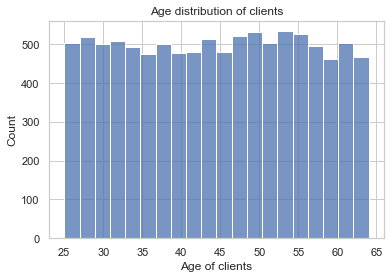

<Figure size 720x432 with 0 Axes>

In [62]:
ax = sns.histplot(final_merged_data['AGE'], bins = 20)
plt.figure(figsize=(10, 6))
ax.set(xlabel='Age of clients', ylabel='Count', title='Age distribution of clients')
plt.show()


We can see the age distribution in our data set is very uniform and they range from 25 to 64 years. With a mean of 44 years

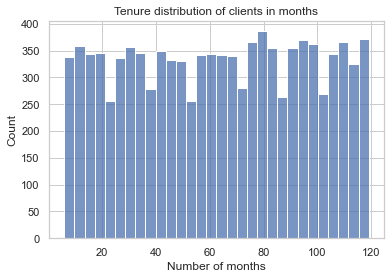

<Figure size 720x432 with 0 Axes>

In [63]:
ax = sns.histplot(final_merged_data['TENURE'], bins = 30)
plt.figure(figsize=(10, 6))
ax.set(xlabel='Number of months', ylabel='Count', title='Tenure distribution of clients in months')
plt.show()

Analyzing the number of months of tenure that the clients have, we can appreaciate that it is more or less uniform with a mean of 64 months or 5 years. However, it seems that there are some patterns indicating that in intervals of a year and half clients tend to drop their or cancel their premium. 

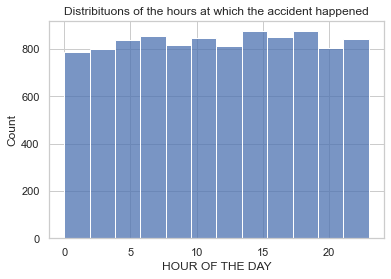

<Figure size 720x432 with 0 Axes>

In [64]:
ax = sns.histplot(final_merged_data['INCIDENT_HOUR_OF_THE_DAY'], bins = 12)
plt.figure(figsize=(10, 6))
ax.set(xlabel='HOUR OF THE DAY', ylabel='Count', title='Distribituons of the hours at which the accident happened')
plt.show()

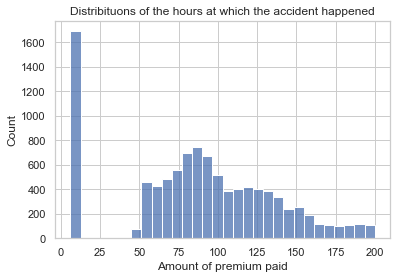

<Figure size 720x432 with 0 Axes>

In [65]:
ax = sns.histplot(final_merged_data['PREMIUM_AMOUNT'], bins = 30)
plt.figure(figsize=(10, 6))
ax.set(xlabel='Amount of premium paid', ylabel='Count', title='Distribituons of the hours at which the accident happened')
plt.show()

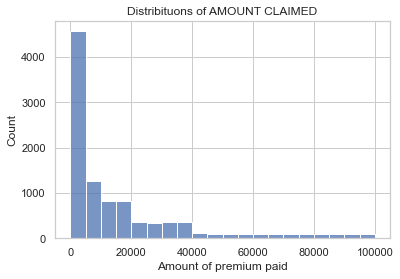

<Figure size 720x432 with 0 Axes>

In [66]:
ax = sns.histplot(final_merged_data['CLAIM_AMOUNT'], bins = 20)
plt.figure(figsize=(10, 6))
ax.set(xlabel='Amount of premium paid', ylabel='Count', title='Distribituons of AMOUNT CLAIMED')
plt.show()

It seems that the data is a bit skewed to the left. But it seems that most of clients paid between 0 and 10 dolars for a premium 

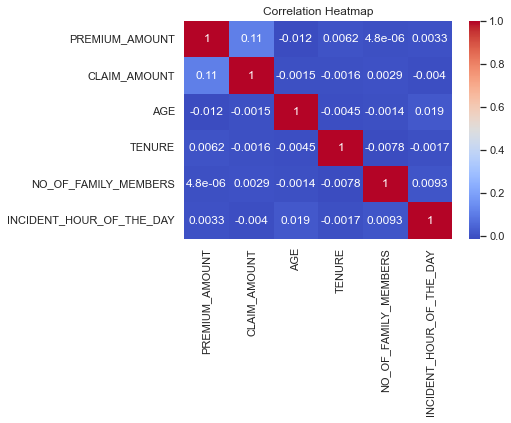

In [67]:
corr = final_merged_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

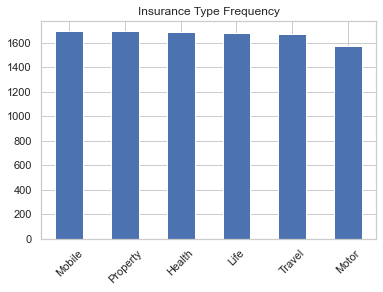

In [68]:
final_merged_data['INSURANCE_TYPE'].value_counts().plot(kind='bar')
plt.title('Insurance Type Frequency')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

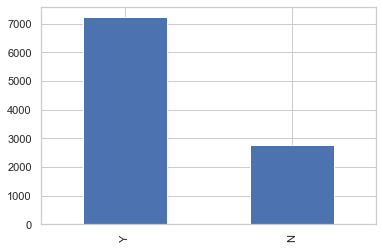

In [69]:
final_merged_data['MARITAL_STATUS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='MARITAL_STATUS', ylabel='CLAIM_AMOUNT'>

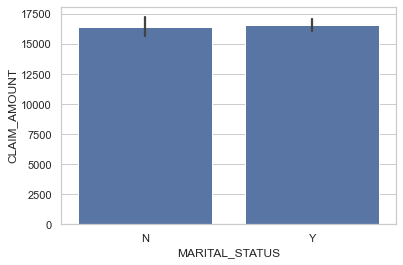

In [70]:
sns.barplot(x = final_merged_data['MARITAL_STATUS'], y = final_merged_data['CLAIM_AMOUNT'])

<AxesSubplot:>

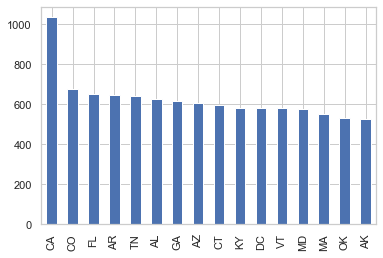

In [71]:
final_merged_data['STATE'].value_counts().plot(kind = 'bar')



Most of the customers seems to be located in California

How is distributed the type of insurance accross each state?

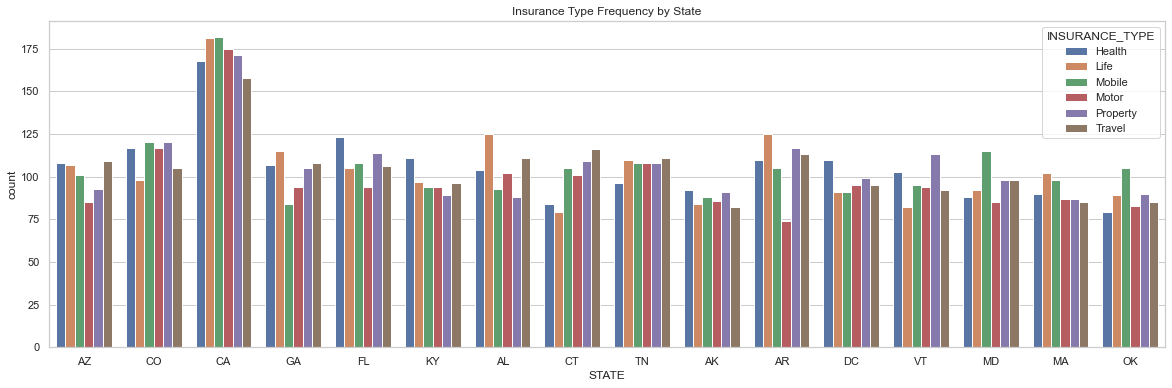

In [87]:
plt.figure(figsize=(20, 6))

sns.countplot(x = 'STATE', hue = 'INSURANCE_TYPE', data = final_merged_data, stat = 'count')
#sns.histplot(x = 'STATE', hue = 'INSURANCE_TYPE', data = final_merged_data ,multiple="stack")
plt.title('Insurance Type Frequency by State')
plt.show()



In [122]:
final_merged_data['STATE'].unique()

array(['AZ', 'CO', 'CA', 'GA', 'FL', 'KY', 'AL', 'CT', 'TN', 'AK', 'AR',
       'DC', 'VT', 'MD', 'MA', 'OK'], dtype=object)